# 1. import utils

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

from matplotlib.pylab import rcParams
import seaborn as sns     
from statsmodels.graphics.tsaplots import plot_acf  
from statsmodels.tsa.stattools import adfuller as ADF  
from statsmodels.graphics.tsaplots import plot_pacf    
from statsmodels.stats.diagnostic import acorr_ljungbox    
from statsmodels.tsa.arima_model import ARIMA

from flask import json

# 2. Read data

In [11]:
#import data
data=pd.read_csv('../data/SecondHand_Property _prices.csv')
# print(data.head())
# print(data[:10])


# heads = data.columns
# for x in heads:
#     print(x)
df = data
head = df.columns
# head



# for x1 in df2:
#     print(x1)

# len(df2)


city="Dublin"
dublin = data[city]
dublin

def convert_currency(value):
    new_value = value.replace(',', '')
    return np.int64(new_value)





# tt = data[city].dropna().apply(convert_currency)



# # print(tt[4:9])


# tt.values

# res = '{name:'+ city +',data='+ ttt +'}'

# res

# ts = data[city].dropna().apply(convert_currency)
# # print(ts[4:9])

# dd = ts.to_list()
# # type(ts)

# dic = {
#   "name": "Dublin",
#   "data": dd
# }
# ts1 = data["Cork"].dropna().apply(convert_currency)
# dd1 = ts1.to_list()
# dic1 = {
#   "name": "Cork",
#   "data": dd1
# }

# series=[]
# series.append(dic)
# series.append(dic1)
# series

# for x4 in series:
#     print(x4['name'])
#     print(x4['data'])
    
    
citys = data.columns

citys=citys[1:len(citys)]
citys  


Index(['National', 'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford',
       'Other Areas'],
      dtype='object')

# 3. convert data into time serious
## 3.1 convert time object into timestamp

In [12]:
#format time
city = 'Cork';
data['YEAR'] = pd.to_datetime(data['YEAR'], format='%Y')
ts = pd.DataFrame(data, columns = ['YEAR', city])
ts.index=ts['YEAR']
del ts['YEAR']
print(ts[5:10])

              Cork
YEAR              
1981-01-01  34,777
1982-01-01  35,437
1983-01-01  36,836
1984-01-01  37,032
1985-01-01  40,210


## 3.2 convert currency (remove ',' from currency)

In [13]:
#  ts['Cork'].dropna()

In [14]:
#convert currency
def convert_currency(value):
    new_value = value.replace(',', '')
    return np.float64(new_value)

# ts[city] = ts[city].dropna().apply(convert_currency)
# print(ts[4:9])

tt = ts[city].dropna().apply(convert_currency)
print(tt[4:9])

YEAR
1980-01-01    32387.0
1981-01-01    34777.0
1982-01-01    35437.0
1983-01-01    36836.0
1984-01-01    37032.0
Name: Cork, dtype: float64


# 4. check stationarity
## 4.1 show time series plot
### 4.11 Observe the time series plot BELOW, the growth trend is obvious and not stable.(NOT STABLE)

TypeError: unhashable type: 'numpy.ndarray'

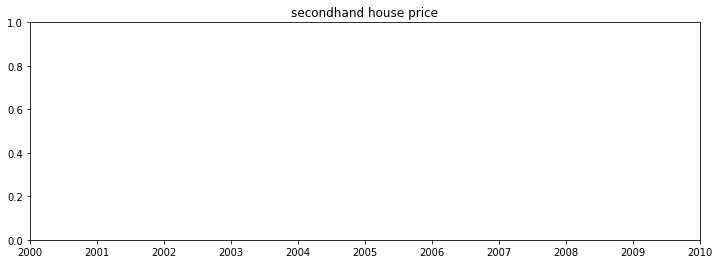

In [15]:
plt.figure(figsize=(12, 4));
plt.title('secondhand house price')
plt.plot(ts)

## 4.2 ACF (check stationarity)

ValueError: could not convert string to float: '15,139'

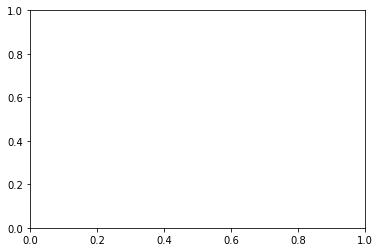

In [9]:
# plot_acf(ts,lags=len(ts)-1);
fig = sm.graphics.tsa.plot_acf(ts.dropna(),lags=len(ts.dropna())-1)
fig.set_size_inches(12, 4)

## 4.3 PACF (check stationarity)

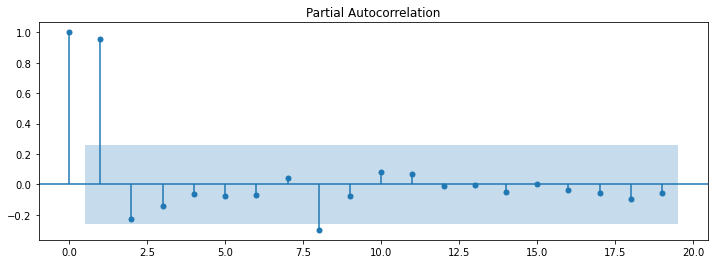

In [13]:
fig_pacf = plot_pacf(ts.dropna(),lags=len(ts.dropna())/2-1,method="ywm",alpha=0.1)
# fig = sm.graphics.tsa.plot_pacf(ts.dropna())
fig_pacf.set_size_inches(12,4)

## 4.4 ADF (check p value and critical value)
In general, a p-value of less than 0.05 means you can reject the null hypothesis that there is a unit root.
The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

In [14]:
import statsmodels as sm

def getAdf(ts):
    temp = np.array(ts)
    adf = sm.tsa.stattools.adfuller(temp)
    return adf
def printAdf(t):
    output=pd.DataFrame(index=['Test Statistic', "p-value", "Lags Used", "N O B","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
    output['value']['Test Statistic'] = t[0]        
    output['value']['p-value'] = t[1]                     
    output['value']['Lags Used'] = t[2]                  
    output['value']['N O B'] = t[3]
    output['value']['Critical Value(1%)'] = t[4]['1%']
    output['value']['Critical Value(5%)'] = t[4]['5%']
    output['value']['Critical Value(10%)'] = t[4]['10%']
    return output
t = getAdf(ts.dropna())

adf = printAdf(t)
# output
adf

,value
Test Statistic,2.151762
p-value,0.99884
Lags Used,9
N O B,30
Critical Value(1%),-3.66992
Critical Value(5%),-2.964071
Critical Value(10%),-2.621171


# 5.Smoothing
Stationarity is a prerequisite for time series analysis, so we need to process the non-stationary series to convert it into a stationary series.

In [49]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import *

plt.rcParams['font.family']=['SimHei']
rcParams['figure.figsize'] = 10, 5

def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    rol_mean = timeSeries.rolling(window=size).mean()
    rol_weighted_mean = timeSeries.ewm(span=size).mean()

    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    f = plt.figure(facecolor='white')
    plt.plot(timeSeries,color='blue')
    plt.title('Price')
    plt.show()


def testStationarity(timeSeries):
    dftest = adfuller(timeSeries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','N O B'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

def draw_acf_pacf(ts, lags=15):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=15, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=15, ax=ax2)
    plt.show()


## 5.1 Logarithmic transformation

In [22]:
ts_log = np.log(ts.dropna())
# plt.plot(ts_log,color='blue')
# ts_log.plot()
# ts.dropna().head()
# plt.show()

# plt.plot(ts.dropna())
# plt.plot(ts_log,color='red')

In [23]:
temp = np.array(ts.dropna())
t = getAdf(temp)
log_Adf=printAdf(t)
log_Adf

,value
Test Statistic,2.151762
p-value,0.99884
Lags Used,9
N O B,30
Critical Value(1%),-3.66992
Critical Value(5%),-2.964071
Critical Value(10%),-2.621171


# 5.2 moving average

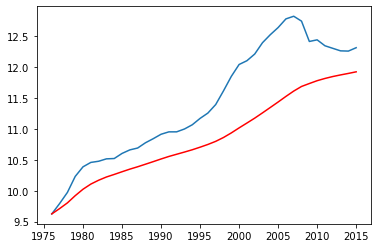

In [24]:
#moving average
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [25]:
temp = np.array(expwighted_avg.dropna())
t = getAdf(temp)
log_Adf=printAdf(t)
log_Adf

,value
Test Statistic,-0.434721
p-value,0.904138
Lags Used,2
N O B,37
Critical Value(1%),-3.620918
Critical Value(5%),-2.943539
Critical Value(10%),-2.6104


## 5.3 difference 1

,value
Test Statistic,-3.177477
p-value,0.021326
Lags Used,10
N O B,26
Critical Value(1%),-3.711212
Critical Value(5%),-2.981247
Critical Value(10%),-2.630095


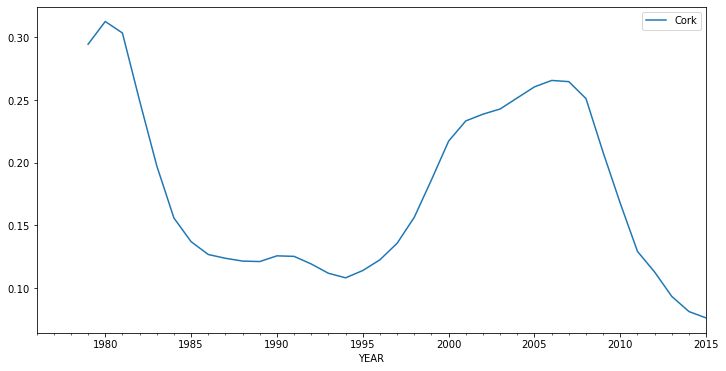

In [26]:
diff1 = expwighted_avg.diff(3)
diff1.plot(figsize=(12,6))
diff1.head()

temp = np.array(diff1.dropna())
t = getAdf(temp)
log_Adf=printAdf(t)
log_Adf


# 5.4 difference 2

In [28]:
# diff2 = diff1.diff(3)
# diff2.plot(figsize=(12,6))
# diff2.head()

# temp = np.array(diff2.dropna())
# t = getAdf(temp)
# log_Adf=printAdf(t)
# log_Adf


# 5.5 Detect white noise 

In [ ]:
rol_mean = ts_log.rolling(window=3).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
testStationarity(ts_diff_1)
ts_diff_1.plot()


diff_shift_ts = ts_diff_1[city].shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)

In [ ]:
# 6. Model selection and parameter determination

In [ ]:
# 7. modeling and Refine the ARIMA model

In [31]:
model = ARIMA(diff1.dropna(), order=(2,1,0))
model_fit = model.fit()
model_fit.summary()

/Users/lwj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/lwj/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so infe

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Cork   No. Observations:                   36
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 113.353
Method:                       css-mle   S.D. of innovations              0.010
Date:                Thu, 13 Jan 2022   AIC                           -218.705
Time:                        11:15:09   BIC                           -212.371
Sample:                    01-01-1980   HQIC                          -216.495
                         - 01-01-2015                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0038      0.006     -0.628      0.530      -0.016       0.008
ar.L1.D.Cork     1.2986      0.142      9.166      0.000       1.021       1.576
ar.L2.D.Cork    -0.5765      0.139     -4.139      0.000      -0.849      -0.303
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1264           -0.6826j            1.3171           -0.0867
AR.2            1.1264           +0.6826j            1.3171            0.0867
-----------------------------------------------------------------------------
"""

In [ ]:
# 8. prediction

In [32]:
model_fit.forecast(10)

(array([0.0754837 , 0.07642874, 0.07702148, 0.07619445, 0.07372675,
        0.06994688, 0.06540878, 0.06064246, 0.05601682, 0.05170547]),
 array([0.01010617, 0.02533336, 0.04276001, 0.05955217, 0.07408845,
        0.08588922, 0.09522632, 0.10270056, 0.10894318, 0.11446933]),
 array([[ 0.05567597,  0.09529144],
        [ 0.02677627,  0.12608121],
        [-0.0067866 ,  0.16082957],
        [-0.04052565,  0.19291455],
        [-0.07148394,  0.21893744],
        [-0.0983929 ,  0.23828665],
        [-0.12123138,  0.25204895],
        [-0.14064694,  0.26193186],
        [-0.15750789,  0.26954153],
        [-0.1726503 ,  0.27606124]]))